# Stroke Prediction

## Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

## Dataset

In [66]:
df_strokes=pd.read_csv('stroke-data.csv')

In [67]:
df_strokes.head(20) # first 5 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Rough summary of the data set

In [68]:
strokes = df_strokes[df_strokes['stroke']==1]
no_strokes = df_strokes[df_strokes['stroke']==0]
strokePrecentage = (len(strokes)*100)/len(df_strokes)

In [69]:
print('No of patients who have got a stroke : ',len(strokes))
print('No of patients who have not got a stroke : ',len(no_strokes))
print('Total Stroke percentage of the dataset : ',strokePrecentage)

No of patients who have got a stroke :  249
No of patients who have not got a stroke :  4861
Total Stroke percentage of the dataset :  4.87279843444227


# Data Exploration

In [70]:
categorical_data = df_strokes.columns[df_strokes.dtypes == object]
categorical_data

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

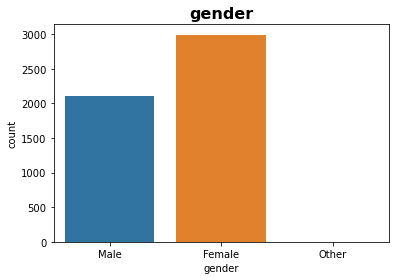

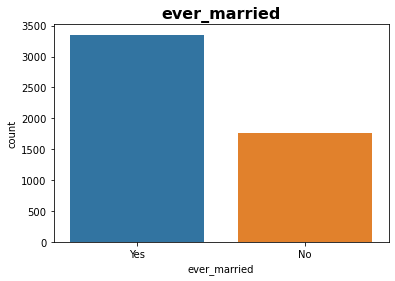

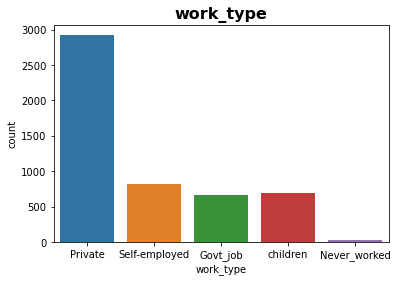

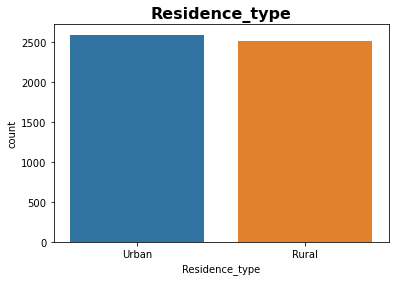

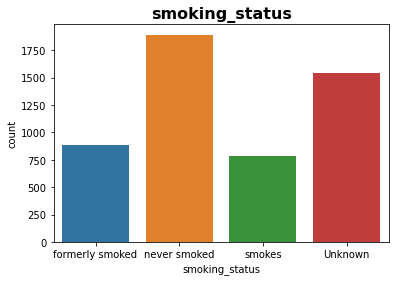

In [71]:
dataset =df_strokes.copy()

for col in categorical_data:
    
    plt.title(col, fontsize=16, fontweight="bold")
    sns.countplot(x=col, data=dataset)
    plt.show()


In [72]:
numerical_data = df_strokes.columns[df_strokes.dtypes != object]
numerical_data

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

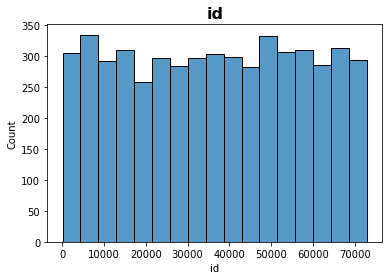

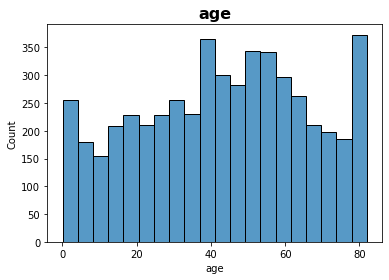

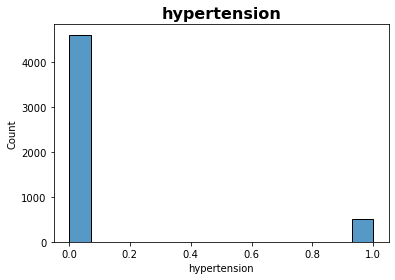

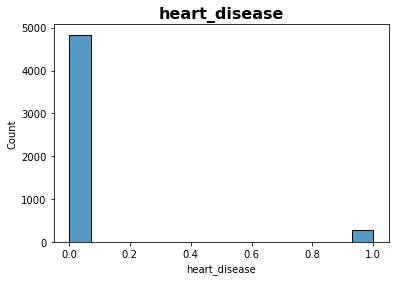

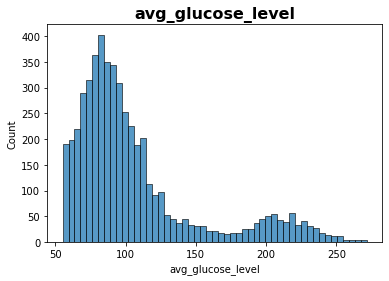

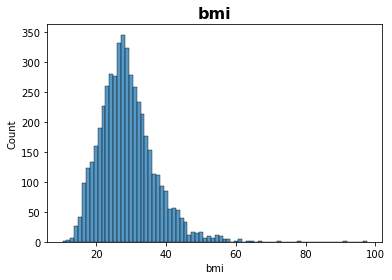

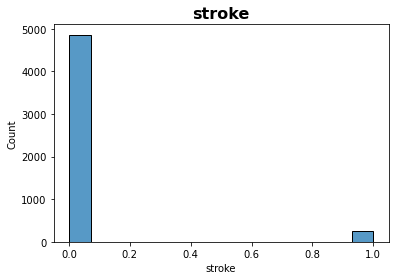

In [73]:
dataset =df_strokes.copy()

for col in numerical_data:
    
    plt.title(col, fontsize=16, fontweight="bold")
    sns.histplot(x=col, data=dataset)
    plt.show()

## Data Cleaning

### Find missing values using heat map

<AxesSubplot:>

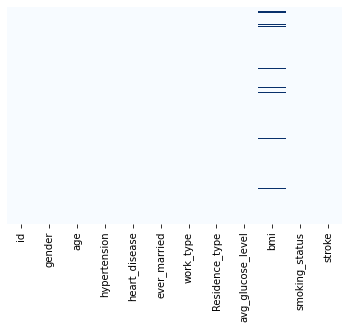

In [74]:
sns.heatmap(df_strokes.isnull(),yticklabels=False,cbar=False,cmap='Blues')

### working with missing values

gender
Female    27.8
Male      28.4
Other     22.4
Name: bmi, dtype: float64


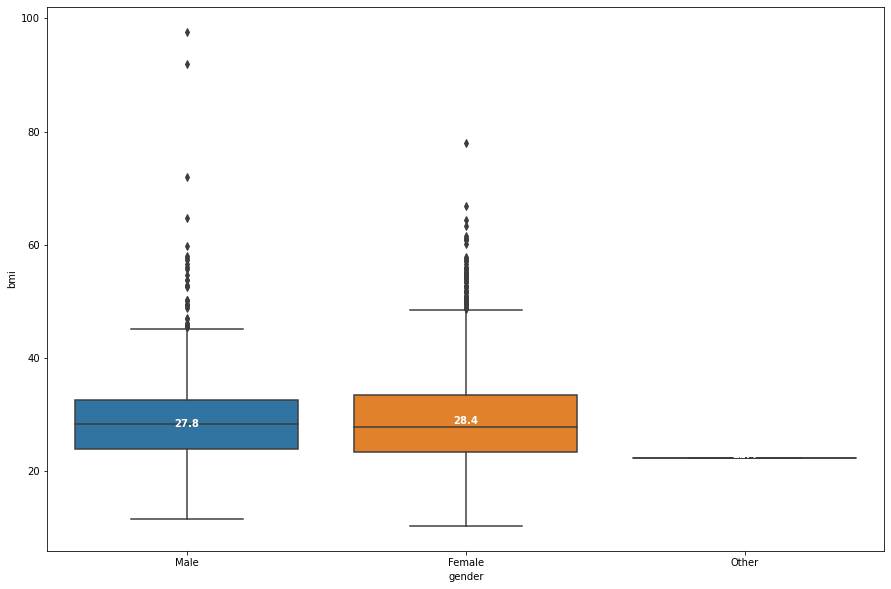

In [75]:
plt.figure(figsize=(15,10))
box_plot=sns.boxplot(x='gender',y='bmi',data=df_strokes)

medians = df_strokes.groupby(['gender'])['bmi'].median()
print(medians)
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick],medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')

### populate null values using the median of bmi

In [76]:
def FillNullBmi(data):
    bmi=data[0]
    gender=data[1]
    
    if pd.isnull(bmi):
        if(gender=='Male'):
            return 27.8
        elif(gender=='Female'):
            return 28.4
        else:
            return 22.4
    else:
        return bmi
            
    

In [77]:
df_strokes['bmi']=df_strokes[['bmi','gender']].apply(FillNullBmi,axis=1)

<AxesSubplot:>

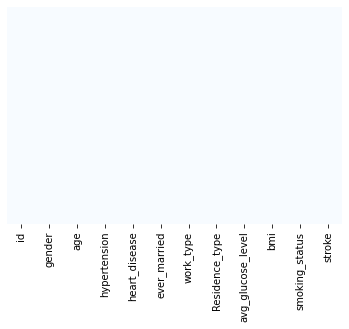

In [78]:
sns.heatmap(df_strokes.isnull(),yticklabels=False,cbar=False,cmap='Blues')

## maping columns with string values into binary columns

In [79]:
# replace gender (male,female) labels using dummies
# therefore we need to drop the row which is labeled as 'other'(1)
df_strokes = df_strokes.loc[df_strokes["gender"] != "Other"]
male=pd.get_dummies(df_strokes['gender'],drop_first=True)
# replace the original gender column with the newly created male column
df_strokes.drop(['gender'],axis=1,inplace=True) # drop the gender col
df_strokes=pd.concat([df_strokes,male],axis=1) # concat the male col
df_strokes

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,28.4,never smoked,1,0
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,Private,Urban,83.75,28.4,never smoked,0,0
5106,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
5108,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1


In [80]:
# replace gender (male,female) labels using dummies
# short method
df_strokes["Married_Lbl"] = [1 if x == "Yes" else 0 for x in df_strokes.ever_married] #label encoding
df_strokes.drop("ever_married", axis=1, inplace=True)

df_strokes["Residence_Lbl"] = [1 if x == "Rural" else 0 for x in df_strokes.Residence_type] #label encoding
df_strokes.drop("Residence_type", axis=1, inplace=True)
df_strokes

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Married_Lbl,Residence_Lbl
0,9046,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,0
1,51676,61.0,0,0,Self-employed,202.21,28.4,never smoked,1,0,1,1
2,31112,80.0,0,1,Private,105.92,32.5,never smoked,1,1,1,1
3,60182,49.0,0,0,Private,171.23,34.4,smokes,1,0,1,0
4,1665,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,83.75,28.4,never smoked,0,0,1,0
5106,44873,81.0,0,0,Self-employed,125.20,40.0,never smoked,0,0,1,0
5107,19723,35.0,0,0,Self-employed,82.99,30.6,never smoked,0,0,1,1
5108,37544,51.0,0,0,Private,166.29,25.6,formerly smoked,0,1,1,1


In [81]:
work_n_smoking_dums = pd.get_dummies(df_strokes[["work_type", "smoking_status"]], drop_first=False)

In [82]:
work_n_smoking_dums

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,0,0,0,1,0
5106,0,0,0,1,0,0,0,1,0
5107,0,0,0,1,0,0,0,1,0
5108,0,0,1,0,0,0,1,0,0


In [83]:
df_strokes.drop(['work_type'],axis=1,inplace=True)
df_strokes.drop(['smoking_status'],axis=1,inplace=True)
df_strokes=pd.concat([df_strokes,work_n_smoking_dums],axis=1)
df_strokes

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Married_Lbl,Residence_Lbl,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.4,1,0,1,1,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,1,1,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,1,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.4,0,0,1,0,0,0,1,0,0,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,0,1,0,0,0,0,1,0,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,1,1,0,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,1,1,0,0,1,0,0,0,1,0,0


## Correlation Heatmap

In [84]:
df_strokes.columns.tolist()

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'Male',
 'Married_Lbl',
 'Residence_Lbl',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

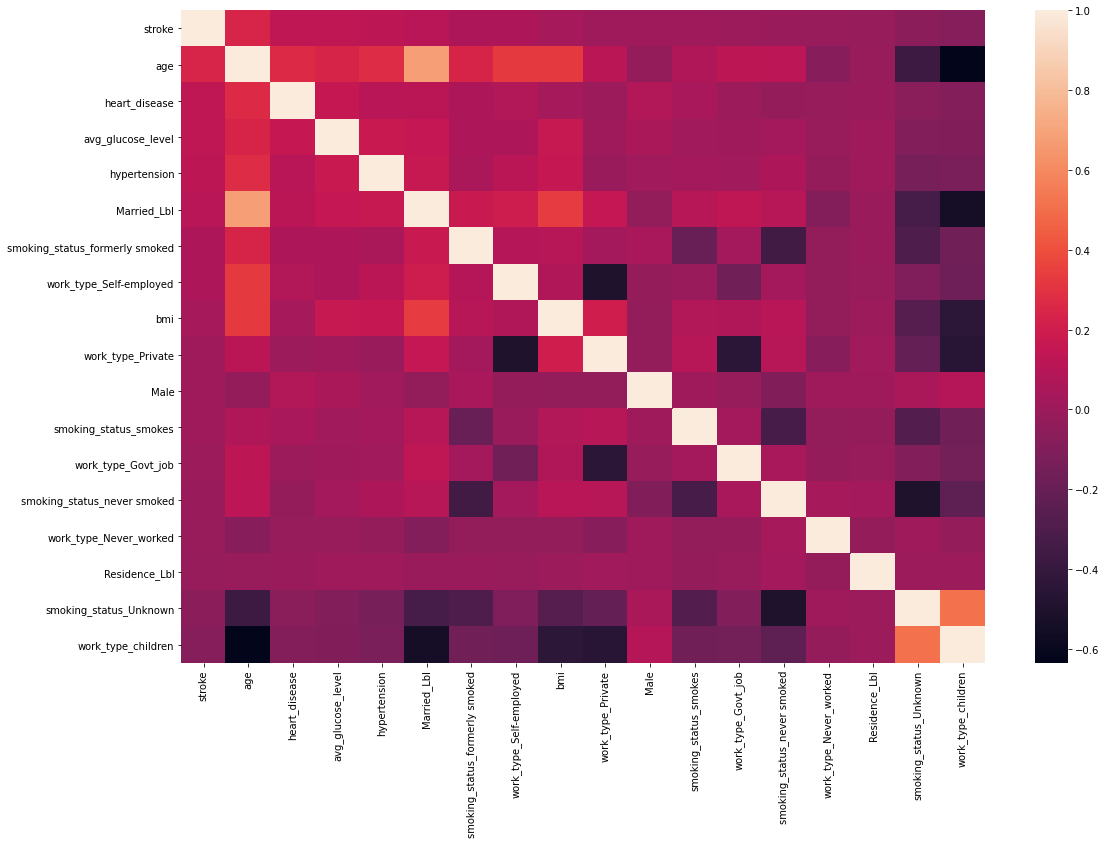

In [85]:
df_strokes =  df_strokes[[
 'stroke',  
 'age',
 'heart_disease',
 'avg_glucose_level', 
 'hypertension', 
 'Married_Lbl', 
 'smoking_status_formerly smoked',   
 'work_type_Self-employed', 
 'bmi',
 'work_type_Private',    
 'Male', 
 'smoking_status_smokes',   
 'work_type_Govt_job', 
 'smoking_status_never smoked',   
 'work_type_Never_worked',    
 'Residence_Lbl',  
 'smoking_status_Unknown',   
 'work_type_children' 
 ]]
df_strokes.corr()

plt.figure(figsize=(18,12))
sns.heatmap(df_strokes.corr())
plt.show()

In [86]:
df_strokes.corr()

,stroke,age,heart_disease,avg_glucose_level,hypertension,Married_Lbl,smoking_status_formerly smoked,work_type_Self-employed,bmi,work_type_Private,Male,smoking_status_smokes,work_type_Govt_job,smoking_status_never smoked,work_type_Never_worked,Residence_Lbl,smoking_status_Unknown,work_type_children
stroke,1.000000,0.245239,0.134905,0.131991,0.127891,0.108299,0.064683,0.062150,0.036157,0.011927,0.009081,0.008920,0.002660,-0.004163,-0.014885,-0.015415,-0.055924,-0.083888
age,0.245239,1.000000,0.263777,0.238323,0.276367,0.679084,0.237347,0.327949,0.324261,0.116678,-0.027752,0.073075,0.129965,0.119207,-0.078667,-0.014031,-0.378366,-0.634320
heart_disease,0.134905,0.263777,1.000000,0.161907,0.108292,0.114601,0.066938,0.086742,0.036654,0.000068,0.085685,0.044030,0.001312,-0.021893,-0.015715,-0.003045,-0.066765,-0.091654
avg_glucose_level,0.131991,0.238323,0.161907,1.000000,0.174540,0.155329,0.067796,0.062770,0.166973,0.016451,0.054722,0.017716,0.013908,0.024011,-0.014665,0.004783,-0.095035,-0.102195
hypertension,0.127891,0.276367,0.108292,0.174540,1.000000,0.164187,0.059022,0.115417,0.158341,-0.005358,0.021223,0.031213,0.017661,0.065018,-0.021612,0.007980,-0.141551,-0.129535
Married_Lbl,0.108299,0.679084,0.114601,0.155329,0.164187,1.000000,0.171960,0.192637,0.334623,0.154104,-0.030171,0.105132,0.133964,0.102663,-0.090873,-0.005988,-0.332335,-0.544658
smoking_status_formerly smoked,0.064683,0.237347,0.066938,0.067796,0.059022,0.171960,1.000000,0.093492,0.103767,0.025170,0.043121,-0.195483,0.029865,-0.350790,-0.030081,-0.008093,-0.301028,-0.160577
work_type_Self-employed,0.062150,0.327949,0.086742,0.062770,0.115417,0.192637,0.093492,1.000000,0.070323,-0.505448,-0.026045,-0.003663,-0.167849,0.030605,-0.028734,-0.010508,-0.106313,-0.172219
bmi,0.036157,0.324261,0.036654,0.166973,0.158341,0.334623,0.103767,0.070323,1.000000,0.203864,-0.028017,0.084391,0.077886,0.107751,-0.028336,0.000359,-0.265191,-0.442257
work_type_Private,0.011927,0.116678,0.000068,0.016451,-0.005358,0.154104,0.025170,-0.505448,0.203864,1.000000,-0.032502,0.100107,-0.444394,0.105003,-0.076075,0.018005,-0.209926,-0.455965


## Handling imbalance data 

> As we depict in the rough summary, our final output is not balanced.

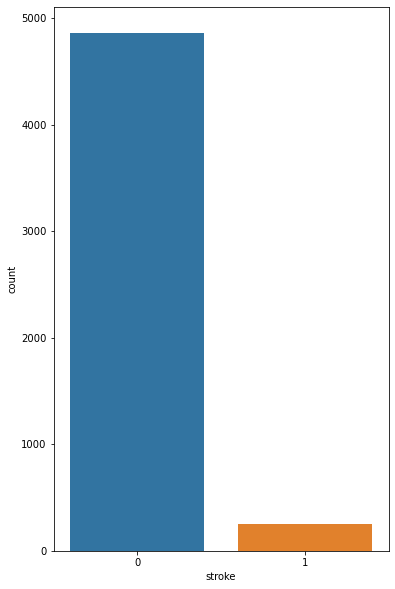

In [87]:
plt.figure(figsize=[6,10])
sns.countplot(x='stroke',data=df_strokes)
plt.show()

### Resampling

In [88]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
## Imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek,SMOTEENN
from collections import Counter


> Random over-sampling with imblearn

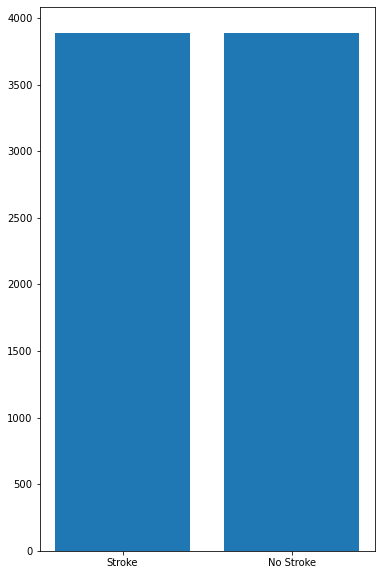

In [89]:
features= df_strokes.drop("stroke",axis=1)
target = df_strokes["stroke"]
X = features.to_numpy()
Y = target.to_numpy()
fixer = MinMaxScaler()
X=fixer.fit_transform(X)
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=42)
counter = Counter(Y_train)

## set SMOTE
smt = SMOTE(random_state=42)

X_train, Y_train =smt.fit_resample(X_train,Y_train)
counter=Counter(Y_train)

## Graph (After balanced the data using SMOTE)
plt.figure(figsize=[6,10])
plt.bar(['Stroke','No Stroke'],pd.Series(counter))
plt.show()



In [90]:
Y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Model Training

In [91]:
X_train.shape

(7776, 17)

In [92]:
Y_train.shape

(7776,)

In [93]:
X_test.shape

(1022, 17)

In [94]:
Y_test.shape

(1022,)

In [95]:
## imports
from sklearn.metrics import confusion_matrix, classification_report


# Evaluating the Model

## 1. Random Forest

In [96]:
# imports
from sklearn.ensemble import RandomForestClassifier

In [97]:
random_forest_classifier = RandomForestClassifier(n_estimators=195,criterion='entropy')
random_forest_classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=195)

### In Data Results

In [98]:
y_predict_train = random_forest_classifier.predict(X_train)

In [99]:
cm = confusion_matrix(Y_train,y_predict_train)

<AxesSubplot:>

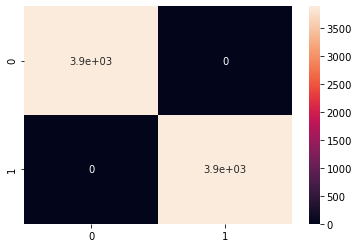

In [100]:
sns.heatmap(cm, annot=True)

In [101]:
# classification report
print(classification_report(Y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       1.00      1.00      1.00      3888

    accuracy                           1.00      7776
   macro avg       1.00      1.00      1.00      7776
weighted avg       1.00      1.00      1.00      7776



### Test Sample Results

In [102]:
# Dealing with real test values
y_predict =random_forest_classifier.predict(X_test)

In [103]:
cm_real = confusion_matrix(Y_test,y_predict)

<AxesSubplot:>

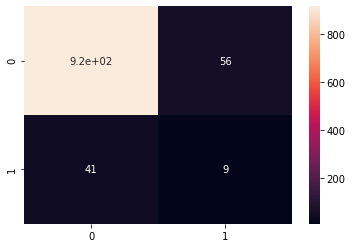

In [104]:
sns.heatmap(cm_real, annot=True)

In [105]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.14      0.18      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.55      1022
weighted avg       0.92      0.91      0.91      1022



## 2. Logistic Regression

In [106]:
# imports
from sklearn.linear_model import LogisticRegression

In [107]:
log = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)
log = log.fit(X_train, Y_train)

### In Sample Results

In [108]:
y_predict_train_log=log.predict(X_train)

In [109]:
cm_log = confusion_matrix(Y_train,y_predict_train_log)

<AxesSubplot:>

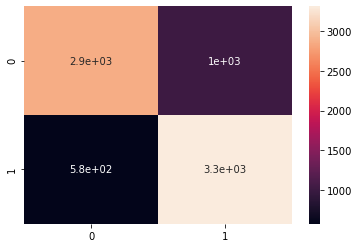

In [110]:
sns.heatmap(cm_log,annot=True)

In [111]:
print(classification_report(Y_train,y_predict_train_log))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3888
           1       0.76      0.85      0.81      3888

    accuracy                           0.79      7776
   macro avg       0.80      0.79      0.79      7776
weighted avg       0.80      0.79      0.79      7776



### Test Sample Results

<AxesSubplot:>

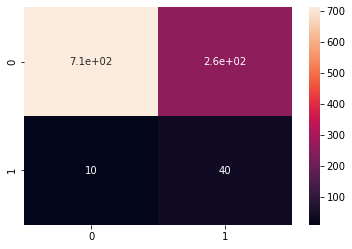

In [112]:
y_predict_log = log.predict(X_test)
cm_log_real = confusion_matrix(Y_test,y_predict_log)
sns.heatmap(cm_log_real,annot=True)

In [113]:
print(classification_report(Y_test,y_predict_log))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.73      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.94      0.73      0.81      1022

